# PROJET SVM ET RÉSEAUX DE NEURONNES : PRÉDICTION DU DIABÈTE CHEZ UNE PERSONNE 

Notre projet se porte sur la prédiction du diabète chez une personne . Pour cela , nous nous sommes munies d'une base de données de plus de 5000 observations et de 18 variables. Tout d'abord , nous allons passer au nettoyage de la base de données , ensuite à l'analyse descriptive des données et enfin aux méthodes de prédictions de la base de données. 

1 . Nettoyage de la base de données 

In [1]:
# Importation des packages 
import pandas as pd 
import numpy as np

# Importation de graphiques
import seaborn as sns
import matplotlib.pyplot as plt

# Importation de séparateurs 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

#Modélisation 

#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression

#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
#Eval
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot





In [2]:
path ="/Users/keitasita/Desktop/diabetes_data .csv"

In [3]:
# importation de la base de donnée 
diabetes = pd.read_csv(path, sep = ";")

In [4]:
diabetes

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [5]:
diabetes = diabetes.drop(columns=['Stroke','HighBP'],axis=1) # Comme c'est la prédiction du diabètes

In [6]:
diabetes

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0


Nous avons 16 features variables et 70692 observations. La variable target est Diabetes . C'est une variable binaire . La variable montre si une personne a le diabète ou non. Dans les 15 features restantes , il existe d'autres variables binaires et des variables catégorielles. Une seule variable est quantitative. 

In [7]:
diabetes.info()# les catégoires des variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Diabetes           

Les variables n'ont pas été converties dans lors bon format. Il faut recoder toutes les variables dans leur bon format.

In [8]:
diabetes['Age']=diabetes.Age.astype('object')
diabetes['Sex']=diabetes.Sex.astype('object')
diabetes['HighChol']=diabetes.HighChol.astype('object')
diabetes['CholCheck']=diabetes.CholCheck.astype('object')
diabetes['BMI']=diabetes.BMI.astype('float64')
diabetes['Smoker']=diabetes.Smoker.astype('object')
diabetes['HeartDiseaseorAttack']=diabetes.HeartDiseaseorAttack.astype('object')
diabetes['PhysActivity']=diabetes.PhysActivity.astype('object')
diabetes['Fruits']=diabetes.Fruits.astype('object')
diabetes['Veggies']=diabetes.Veggies.astype('object')
diabetes['HvyAlcoholConsump']=diabetes.HvyAlcoholConsump.astype('object')
diabetes['GenHlth']=diabetes.GenHlth.astype('object')
diabetes['MentHlth']=diabetes.MentHlth.astype('object')
diabetes['PhysHlth']=diabetes.PhysHlth.astype('object')
diabetes['DiffWalk']=diabetes.DiffWalk.astype('object')
diabetes['Diabetes']=diabetes.Diabetes.astype('object')

In [9]:
# Vérification des valeurs nulles
diabetes.isna().sum(axis=0)

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
dtype: int64

Nous n'avons pas de valeurs manquantes dans notre dataset. 

2 . STATISTIQUES DESCRIPTIVES DE LA BASE DE DONNÉES 

        a_ Description de la variable à prédire 

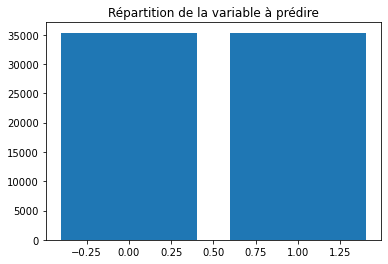

In [10]:
plt.bar(
    diabetes.Diabetes.value_counts().index,
     diabetes.Diabetes.value_counts().values
)
plt.title("Répartition de la variable à prédire")
plt.show()

Nous pouvons constater que notre variable à prédire est équilibrée. Il y'a autant de personnes qui sont diabétiques que celles qui ne le sont pas. Soit 35346 personnes pour chaque éventualité. 

Nous allons maitenant regarder la relation la variable à prédire avec quelques variables explicatives quantitatives 

/Users/keitasita/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


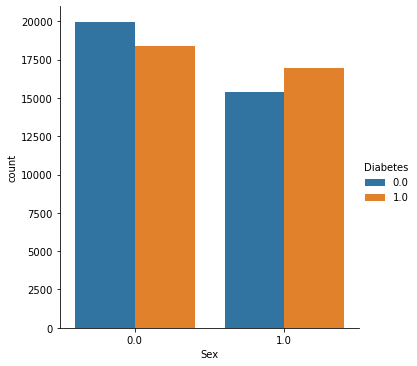

In [11]:
sns.factorplot(x = "Sex", hue = "Diabetes", data = diabetes, kind = "count")

 Il existe quand meme une différence entre les hommes et les femmes. En effet les femmes sont plus susceptibles de ne pas avoir le diabète que les hommes. Alors que les hommes ont plus de chance d'avir le diabète que les femmes.

/Users/keitasita/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


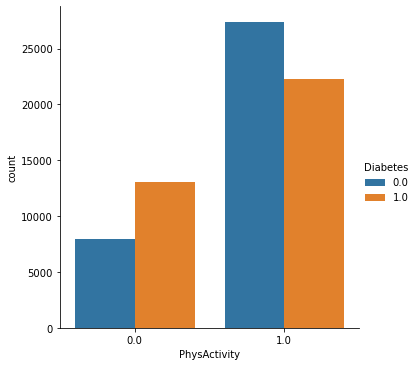

In [12]:
sns.factorplot(x = "PhysActivity", hue = "Diabetes", data = diabetes, kind = "count")

Il  y'a une relation négative entre l'activité physique au cours de 30 jours et le diabète. En effet , plus une personne fait du sport , moins elle a de chance d'avoir le diabète.

/Users/keitasita/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


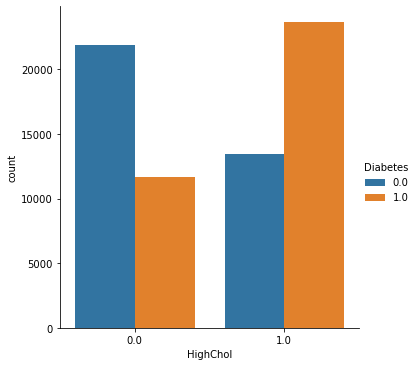

In [13]:
sns.factorplot(x = "HighChol", hue = "Diabetes", data = diabetes, kind = "count")

Il existe une relation positive netre les variables Diabetes et HighChol. Plus une personne a un haut niveau de cholestérol, plus celle-ci a de chance à avoir le diabète.

/Users/keitasita/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


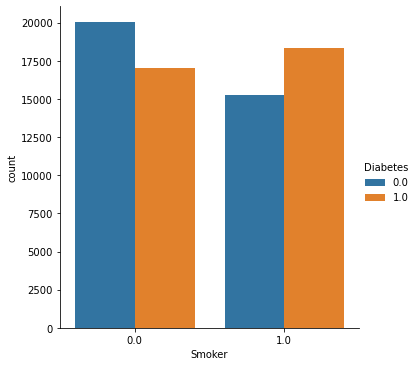

In [14]:
sns.factorplot(x = "Smoker", hue = "Diabetes", data = diabetes, kind = "count")

Il existe un lien positif avec le fait de fumer au moins 100 cigarettes dans sa vie et avoir le diabète. Plus une personne n'a pas fumé 100 cigarettes dans sa vie , plus elle a de chance de pas avoir le diabète.


          b_ Descriptions des variables quantitatives

In [15]:
diabetes.BMI.describe().to_frame()

,BMI
count,70692.000000
mean,29.856985
std,7.113954
min,12.000000
25%,25.000000
50%,29.000000
75%,33.000000
max,98.000000


Dans notre échantillon , la moyenne de l'indice de masse corporelle est de 29,85. La valeur minimun est de 12 et la valeur maximun est de 98. 25% des personnes interrogées ont un IMC inférieur ou égale à 25 et les 75% ont ce dernier qui inférieur ou égal à 33. La moitié des personnes interrogées ont un IMC inférieur ou égal à 29. 
On peut dire que les personnes intérrogées sont généralement en situation de surpoids.

/Users/keitasita/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI'>

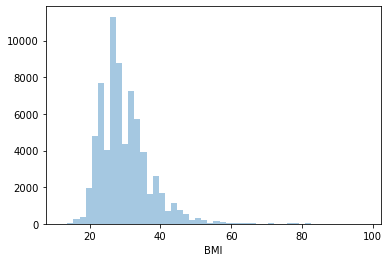

In [16]:
 sns.distplot(diabetes.BMI, kde = False)

Nous avons une distribution asymétrique de la variable BMI. L'indice de masse corporelle a une asymétrie positive. 

/Users/keitasita/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/keitasita/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


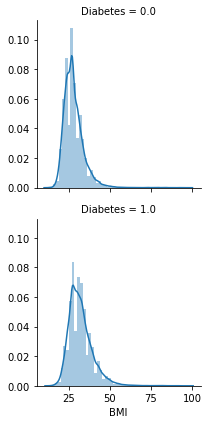

In [17]:
p = sns.FacetGrid(diabetes, row = "Diabetes")
p.map(sns.distplot, "BMI")

La probabilité d'avoir le diabète est plus élevée si l'IMC est entre 25 et 50. De manière générale les diabétiques ont un fort IMC.

<AxesSubplot:ylabel='BMI'>

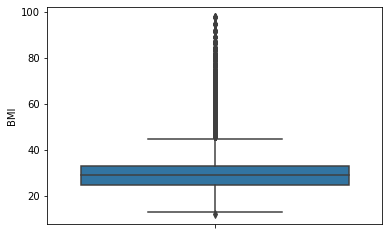

In [18]:
sns.boxplot(y = "BMI", data = diabetes)

La variable BMI possède des valeurs aberrantes suivant le boxplot. On constate que ces dernières ont tendance à etre supérieures à 50. Ainsi , on décide de supprimer les valeurs supérieures à 50.

In [19]:
diabetes = diabetes[diabetes.BMI<50]

In [20]:
diabetes.BMI.describe()

count    69574.000000
mean        29.406042
std          6.074716
min         12.000000
25%         25.000000
50%         28.000000
75%         33.000000
max         49.000000
Name: BMI, dtype: float64

En refaisant la statistique descriptive de la variable , la moyenne de l'indice de masse corporelle est de 29,41. La valeur minimun est de 12 et la valeur maximun est de 49 . 25% des personnes interrogées ont un IMC inférieur ou égale à 25 et les 75% ont ce dernier qui inférieur ou égal à 33. La moitié des personnes interrogées ont un IMC inférieur ou égal à 28. C'est toujours pareil, les personnes intérrogées sont généralement en situation de surpoids.

               c_Description des variables qualitatives    

In [21]:
# Statistiques descriptives des variables explicatives qualitatives 
Age=diabetes.Age.value_counts().to_frame()
Sex=diabetes.Sex.value_counts().to_frame()
HighChol=diabetes.HighChol.value_counts().to_frame()
CholCheck=diabetes.CholCheck.value_counts().to_frame()
Smoker=diabetes.Smoker.value_counts().to_frame()
HeartDiseaseorAttack=diabetes.HeartDiseaseorAttack.value_counts().to_frame()
PhysActivity=diabetes.PhysActivity.value_counts().to_frame()
Fruits=diabetes.Fruits.value_counts().to_frame()
Veggies=diabetes.Veggies.value_counts().to_frame()
HvyAlcoholConsump=diabetes.HvyAlcoholConsump.value_counts().to_frame()
GenHlth=diabetes.GenHlth.value_counts().to_frame()
MentHlth=diabetes.MentHlth.value_counts().to_frame()
PhysHlth=diabetes.PhysHlth.value_counts().to_frame()
DiffWalk=diabetes.DiffWalk.value_counts().to_frame()




In [22]:
print(Sex) , print(Age)
print(HighChol)
print(CholCheck)
print(Smoker)
print(HeartDiseaseorAttack)
print(Fruits)
print(PhysActivity)
print(Veggies)
print(HvyAlcoholConsump)
print(GenHlth)
print(MentHlth)
print(PhysHlth)
print(DiffWalk)


       Sex
0.0  37643
1.0  31931
        Age
10.0  10699
9.0    9920
8.0    8433
11.0   7986
7.0    6708
13.0   5411
12.0   5373
6.0    4533
5.0    3434
4.0    2731
3.0    2002
2.0    1370
1.0     974
     HighChol
1.0     36512
0.0     33062
     CholCheck
1.0      67845
0.0       1729
     Smoker
0.0   36466
1.0   33108
     HeartDiseaseorAttack
0.0                 59301
1.0                 10273
     Fruits
1.0   42672
0.0   26902
     PhysActivity
1.0         49206
0.0         20368
     Veggies
1.0    54925
0.0    14649
     HvyAlcoholConsump
0.0              66572
1.0               3002
     GenHlth
3.0    23102
2.0    19756
4.0    12900
1.0     8254
5.0     5562
      MentHlth
0.0      47533
30.0      4178
2.0       3223
5.0       2462
1.0       2014
3.0       1928
10.0      1880
15.0      1714
20.0      1087
4.0        962
7.0        808
25.0       404
14.0       344
6.0        278
8.0        192
12.0       125
28.0        95
21.0        82
29.0        50
18.0        40
9.0    

Concernant les statistiques descriptives pour les données qualitatives. Pour la variable Sex , Il y'a plus de femmes que d'hommes. Elles sont au nombre de 38.386 alors que les hommes sont au nombre de 32.306. Pour l'age , la majorité des personnes interrogées se trouvent entre 65 et 69 ans (10856). Elle est suivie des personnes agées de 60 à 64 ans au nombre de 10.112 personnes. Les jeunes de 18 à 24 ans sont en minorité (979 personnes). De manière générale , ce sont les personnes agées de 50 ans à 74 ans qui sont les plus nombreuses dans nos observations. On constate aussi que la majorité des personnes fume au moins 100 gigarettes  . Vu qu'on une population assez viellissante , c'est que le nombre de personnes ayant un un fort niveau de cholestérol soit plus nombreux. 
On utilise le meme procédé pour chaque variable.

/Users/keitasita/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


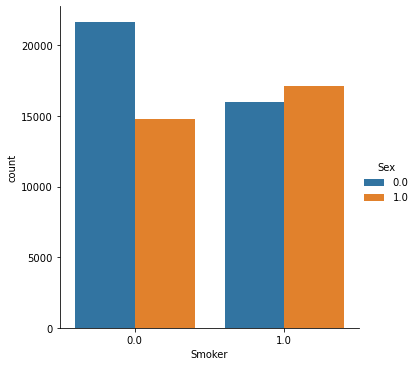

In [23]:
sns.factorplot(x = "Smoker", hue = "Sex", data = diabetes, kind = "count")

Parmi les fumeurs , ce sont les hommes qui fument un peu plus que les femmes. Dans le groupe des non fumeurs , ce sont les femmes qui ne fument pas. 

Vu que des variables explicatives qualitatives peuvent etre dépendantes , nous allons appliquer le test de khi2 pour vérifier la dépendance des variables explicatives qualitatives. En effet , c'est pour éviter un risque de multicolinéarité qui peut pertuber la prédiction de la variable Diabetes. L'hypothèse nulle du test suppose que les variables sont dépenantes et dans l'hypothèse alternative suppose que les variables sont indépendantes. Si la pvalue du test est inféieur à 0,05 alors les variables sont dépendantes.

       d_ Dépendance entre les variables qualitatives

Test de KHI2

In [24]:
from scipy.stats import chi2_contingency as chi2_contingency

In [25]:
ma_1=pd.crosstab(diabetes["Sex"],diabetes["Age"])
ma_2=pd.crosstab(diabetes["HighChol"],diabetes["Age"])
ma_3=pd.crosstab(diabetes["Smoker"],diabetes["Sex"])
ma_4=pd.crosstab(diabetes["HeartDiseaseorAttack"],diabetes["Sex"])
ma_5=pd.crosstab(diabetes["PhysActivity"],diabetes["HighChol"])
ma_6=pd.crosstab(diabetes["CholCheck"],diabetes["HighChol"])
ma_7=pd.crosstab(diabetes["Smoker"],diabetes["CholCheck"])
ma_8=pd.crosstab(diabetes["PhysActivity"],diabetes["CholCheck"])
ma_9=pd.crosstab(diabetes["Smoker"],diabetes["PhysActivity"])
ma_10=pd.crosstab(diabetes["Smoker"],diabetes["HeartDiseaseorAttack"])
ma_11=pd.crosstab(diabetes["HeartDiseaseorAttack"],diabetes["PhysActivity"])
ma_12=pd.crosstab(diabetes["HeartDiseaseorAttack"],diabetes["Fruits"])
ma_13=pd.crosstab(diabetes["PhysActivity"],diabetes["Fruits"])
ma_14=pd.crosstab(diabetes["PhysActivity"],diabetes["Veggies"])
ma_15=pd.crosstab(diabetes["Fruits"],diabetes["Veggies"])
ma_16=pd.crosstab(diabetes["Fruits"],diabetes["HvyAlcoholConsump"])
ma_17=pd.crosstab(diabetes["Veggies"],diabetes["HvyAlcoholConsump"])
ma_18=pd.crosstab(diabetes["Veggies"],diabetes["GenHlth"])
ma_19=pd.crosstab(diabetes["HvyAlcoholConsump"],diabetes["GenHlth"])
ma_20=pd.crosstab(diabetes["HvyAlcoholConsump"],diabetes["MentHlth"])
ma_21=pd.crosstab(diabetes["GenHlth"],diabetes["MentHlth"])
ma_22=pd.crosstab(diabetes["GenHlth"],diabetes["PhysHlth"])
ma_23=pd.crosstab(diabetes["MentHlth"],diabetes["PhysHlth"])
ma_24=pd.crosstab(diabetes["MentHlth"],diabetes["DiffWalk"])
ma_25=pd.crosstab(diabetes["PhysHlth"],diabetes["DiffWalk"])
ma_26=pd.crosstab(diabetes["Smoker"],diabetes["DiffWalk"])

In [26]:
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_1)# Dépendance entre les variables Sex et Age (1.6745169584209813e-15)
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_2)# Dépendance entre Age et HighChol (0.0)
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_3)# Dépendance entre les variables Sex et Smoker (3.4416588730482326e-195)
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_4)# Dépendance entre les variables Sex et HeartDiseaseorAttack(4.927057548566815e-150)
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_5)# Dépendance entre les variables PhysActivity et HighChol 
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_6)# Dépendance entre les variables CholCheck et HighChol
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_7)# Pas de dépendance entre les variables CholCheck et Smoker (0.25967760421630237)
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_8)# dépendance entre ces variables holCheck et PhysActivity
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_9) #dépendance entre Smoker et PhysActivity
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_10)# dépendance entre Smoker et HeartDiseaseorAttack
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_11)# dépendance entre PhysActivity et HeartDiseaseorAttack
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_12)# dépendance entre Fruits et HeartDiseaseorAttack
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_13)# dépendance entre  PhysActivity et Fruits
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_14)# dépandence entre Veggies et  PhysActivity
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_15)# dépandence entre Fruits et Veggies
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_16)# Dépendance entre les variables Fruits et HvyAlcoholConsump
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_17)#Dépendance entre les variables Veggies et HvyAlcoholConsump
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_18)#Dépendance entre les variables Veggies et GenHlth
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_19)#Dépendance entre les variables HvyAlcoholConsump et GenHlth
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_20)#Dépendance entre les variables HvyAlcoholConsump et MentHlth
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_21)#Dépendance entre les variables GenHlth et MentHlth
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_22)# Dépendance entre les variables GenHlth et PhysHlth
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_23)# Dépendance entre les variables MentHlth  et PhysHlth
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_24)# Dépendance entre les variables MentHlth  et DiffWalk
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_25)# Dépendance entre les variables PhysHlth  et DiffWalk
khi2, pval , ddl , contingent_theorique = chi2_contingency(ma_26)# Dépendance entre les variables Smoker et DiffWalk

In [27]:
# Il faut appliquer pour chaque tableau croisée la formule ci_dessous et regarder la pvalue qui est ici pval.
#khi2, pval , ddl , contingent_theorique = chi2_contingency()
#print(pval)

Nous constatons que la majorité des variables explicatives qualitatives sont dépendantes entre elle. 
Dans ce cas , nous allons passer à la suppression de variables. 

In [28]:
diabetes = diabetes.drop(columns=['Age','Sex','HighChol','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies',
                                  'HvyAlcoholConsump','GenHlth','MentHlth','PhysHlth','DiffWalk'], axis=1)

In [29]:
diabetes# Nous nous retrouvons avec 3 variables explicatives.

,CholCheck,BMI,Smoker,Diabetes
0,1.0,26.0,0.0,0.0
1,1.0,26.0,1.0,0.0
2,1.0,26.0,0.0,0.0
3,1.0,28.0,1.0,0.0
4,1.0,29.0,1.0,0.0
...,...,...,...,...
70687,1.0,37.0,0.0,1.0
70688,1.0,29.0,1.0,1.0
70689,1.0,25.0,0.0,1.0
70690,1.0,18.0,0.0,1.0


   3 . PRÉPARATION DE LA BASE DE DONNÉES 

In [30]:
diabetes['Diabetes']=diabetes.Diabetes.astype('int32')

In [31]:
bin_diabetes = diabetes[diabetes.Diabetes!=2]

In [32]:
X_train , X_test, y_train, y_test = train_test_split(bin_diabetes.iloc[:,:3],  
                                                    bin_diabetes['Diabetes'], 
                                                    test_size=0.30 ,
                                                    shuffle=True ,
                                                    random_state=42
                                                   )

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48701, 3)
(20873, 3)
(48701,)
(20873,)


In [34]:
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [35]:
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

  4. LES DIFFÉRENTES MÉTHODES POUR PRÉDIRE LA VARIABLES DIABÈTES

In [36]:
#Regression logistique
lgr = LogisticRegression( random_state=42)
lgr.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

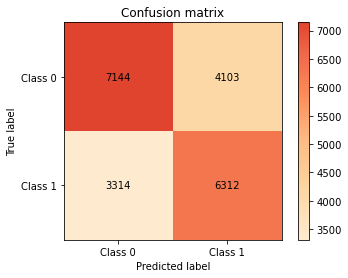

In [37]:
plot.confusion_matrix(lgr.predict(X_test_sc), y_test)

In [38]:
print(classification_report(y_test,lgr.predict(X_test_sc)))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66     10458
           1       0.66      0.61      0.63     10415

    accuracy                           0.64     20873
   macro avg       0.65      0.64      0.64     20873
weighted avg       0.65      0.64      0.64     20873



Suivant la matrice de confusion du modèle logistique , la prédiction ecxate du  nombre de personnes n'ayant pas le diabète est de 7144 .Celle de ceux qui ont le diabète est de 6312 . Ce qui nous donne un accuracy de 65%. Ce qui veut dire que le modèle logistique prédit correctement à la variable Diabetes à 64%. 

In [39]:
#Linear SVM
l_SVC = LinearSVC(random_state=40, max_iter=2000)
l_SVC.fit(X_train_sc, y_train)

LinearSVC(max_iter=2000, random_state=40)

<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

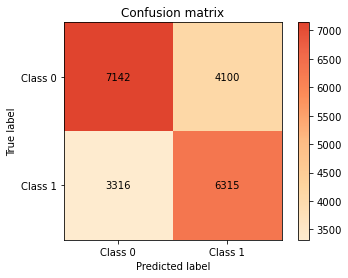

In [40]:
plot.confusion_matrix(l_SVC.predict(X_test_sc), y_test)

In [41]:
print(classification_report(y_test,l_SVC.predict(X_test_sc)))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66     10458
           1       0.66      0.61      0.63     10415

    accuracy                           0.64     20873
   macro avg       0.65      0.64      0.64     20873
weighted avg       0.65      0.64      0.64     20873



Pour le modèle Linear SVC , On obtient la matrice de confusion.La prédiction ecxate du  nombre de personnes n'ayant pas le diabète est de 7142 .Celle de ceux qui ont le diabète est de 6315 . Ce qui nous donne un accuracy de 64%. Ce qui veut dire que le modèle LinearSVM prédit correctement à la variable Diabetes à 64%. 

In [42]:
#SVM avec kernel
svc = SVC(kernel='linear',random_state=42)
svc.fit(X_train_sc,y_train)



SVC(kernel='linear', random_state=42)

<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

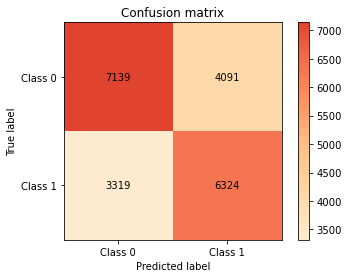

In [43]:
plot.confusion_matrix(svc.predict(X_test_sc), y_test)

In [44]:
print(classification_report(y_test,svc.predict(X_test_sc)))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66     10458
           1       0.66      0.61      0.63     10415

    accuracy                           0.64     20873
   macro avg       0.65      0.64      0.64     20873
weighted avg       0.65      0.64      0.64     20873



Pour le modèle SVC avec le noyau linéaire , la prédiction ecxate du nombre de personnes n'ayant pas le diabète est de 7139 .Celle de ceux qui ont le diabète est de 6324 . Ce qui nous donne un accuracy de 64%. Ce qui veut dire que le modèle SVC avec le noyau linéaire prédit correctement à la variable Diabetes à 64%

In [45]:
#SGD classifier
sgdc_svm = SGDClassifier(loss='hinge' ,random_state=42)
sgdc_svm.fit(X_train_sc, y_train)

SGDClassifier(random_state=42)

<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

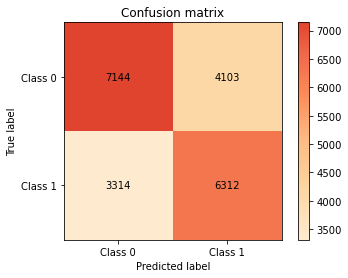

In [46]:
plot.confusion_matrix(sgdc_svm.predict(X_test_sc), y_test)

In [47]:
print(classification_report(y_test,sgdc_svm.predict(X_test_sc)))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66     10458
           1       0.66      0.61      0.63     10415

    accuracy                           0.64     20873
   macro avg       0.65      0.64      0.64     20873
weighted avg       0.65      0.64      0.64     20873



Pour le modèle SGDClassifier, la prédiction ecxate du nombre de personnes n'ayant pas le diabète est de 7144. .Celle de ceux qui ont le diabète est de 6312 . Ce qui nous donne un accuracy de 64%. Ce qui veut dire que le modèle SGDClassifier prédit correctement à la variable Diabetes à 64%

Nous nous retrouvons avec les 4 modèles SVM qui ont des accracy égaux . Ceci n'est pas encore suffisant. Pour faire notre choix de modèle , nous allons regarder l'évolution des accuracy_scores en fonction de folds.

In [48]:

cvs_lgr = cross_val_score(lgr, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_lsvc = cross_val_score(l_SVC, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_svc = cross_val_score(svc, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_sgdc = cross_val_score(sgdc_svm, X_train_sc, y_train, cv=5, scoring='accuracy')

In [49]:
#Get data output from cross_val_score
df_cross = pd.DataFrame(np.transpose(np.c_[cvs_lgr,cvs_lsvc,cvs_sgdc,cvs_svc]), 
                        columns=['fold1','fold2','fold3','fold4','fold5'])
#Adding model label
df_cross['model'] = ['lgr','lsvc','sgdc','svc']

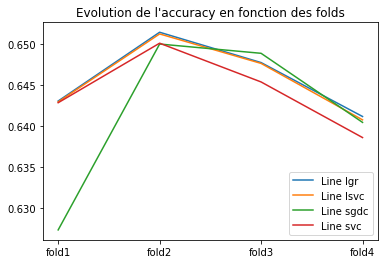

In [50]:
#Regardons l'évolution des scores pour chaque fold
for row in range(df_cross.shape[0]):
    plt.plot( df_cross.iloc[row,0:4] ,label='Line '+str(df_cross.iloc[row,5]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des folds")
plt.show()

In [51]:
df_cross.head(5)

,fold1,fold2,fold3,fold4,fold5,model
0,0.643055,0.651437,0.647741,0.641170,0.642402,lgr
1,0.642952,0.651232,0.647639,0.640760,0.642300,lsvc
2,0.627348,0.650000,0.648871,0.640452,0.633060,sgdc
3,0.642850,0.650103,0.645380,0.638604,0.636242,svc


In [52]:
for i in range(4):

    mean_model = df_cross.iloc[:,0:5].mean(axis=1)[i]
    std_model = df_cross.iloc[:,0:5].std(axis=1)[i]
    
    print('Le modèle N° '+ str(i) + ' a une accuracy de '  + str(mean_model) + ' et un std : ' + str(std_model))

Le modèle N° 0 a une accuracy de 0.6451613335702708 et un std : 0.004301729518709277
Le modèle N° 1 a une accuracy de 0.6449765307501243 et un std : 0.004337651749826241
Le modèle N° 2 a une accuracy de 0.6399460503424739 et un std : 0.009837588023342076
Le modèle N° 3 a une accuracy de 0.6426356704351113 et un std : 0.0054878183996219685


#CHOIX DU MODÈLE

On constate que les méthodes ont le meme taux de bonnes prédictions qui est de 64%. Cependant nous choisissons le modèle logistique car ve dernier possède la plus grande accuracy et aussi il a le plus petit std qui de 0,00430. Comparé aux autres modèles , il a moins de chances de faire un surraprentissage. Nous voulions appliquer l'agorithme Gridsearch pour améliorer notre modèle. Malheureusement , nous pouvons pas appliquer l'algorithme sur notre ordinateur. Donc nous allons passer à l'analyse du modèle choisi. 

5 . Analyse du modèle choisi

In [53]:
print('Training score: ' + str(lgr.score(X_train_sc,y_train)), 
      '\n',
      'Test score: ' + str(lgr.score(X_test_sc, y_test))
     )

Training score: 0.6451612903225806 
 Test score: 0.6446605662817995


Nous ne risquons pas d'avoir du surapprentissage puisque la moyenne de accurancy ou score de l'entrainement et celui du test sont quasiment pareils.

In [54]:
lgr.coef_

array([[0.28, 0.7 , 0.18]])

Nous avons les coefficients des variables explicatives qui ont servies à l'établissement du modèle. On peut que chacune des variables explicatives possède une relation positive avec la variable à prédire Diabetes. 0,28 est le coefficient de la variable CholCheck , 0,70 estle coefficient de la variable BMI et 0,18 est le coefficient de la variable Smoker. 